In [1]:
#importing library functions
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
import streamlit as st
import glob
import re

In [2]:
#importing custom functions to test separate functionality (these functions exist in notebook now to modify)
#from root_data_clean import *
#from root_data_match import *
#from root_data_analysis import *

In [3]:
# getting the data from the directory (if the data (.csv) files stored in /anon_data) 
code_dir = os.getcwd()
data_dir = code_dir + '/anon_data/'

In [4]:
#parse the data file names:
import glob
org_dir_tog = []
org_num_tog = []
for name in glob.glob(os.path.join(data_dir, 'anonymized-anomalies-org*.csv')):
    org_dir_tog.append(name)
    org_num = re.findall("anonymized-anomalies-org(\d+).csv", name)
    org_num = int(org_num[0])
    org_num_tog.append(org_num)

In [5]:
# list of organizations available for analysis
org_num_tog

[222, 113]

In [6]:
#####>#>CHOOSE ONE ORG NUMBER<#<#####
org_num = org_num_tog[1]
org_num

113

# Anomaly list

In [7]:
#reading in the anomaly list

In [8]:
full_anomalies_df = pd.read_csv(data_dir+'anonymized-anomalies-org'+str(org_num)+'.csv') 
full_anomalies_df

,Unnamed: 0,metric_name,source_name,source_token,start_anomaly,end_anomaly,duration,max_var
0,0,1,26,28,2020-05-31 18:04:28.025311,2020-05-31 20:04:19.548027,1,-84.0
1,1,2,26,28,2020-06-02 16:17:22.843954,2020-06-02 19:15:53.211756,2,-100.0
2,2,3,27,29,2020-06-03 19:05:51.744819,2020-06-03 21:07:06.843240,2,-30.0
3,3,4,27,29,2020-06-03 20:06:39.529877,2020-06-03 22:06:09.928545,1,-31.0
4,4,5,26,28,2020-06-03 21:16:27.237386,2020-06-04 00:15:33.260124,2,74.0
...,...,...,...,...,...,...,...,...
80,80,9,27,29,2020-06-25 19:00:00.000000,2020-06-25 23:00:00.000000,4,34.0
81,81,3,27,29,2020-06-25 20:00:00.000000,2020-06-26 00:00:00.000000,4,32.0
82,82,22,27,29,2020-06-25 21:00:00.000000,2020-06-26 00:00:00.000000,3,48.0
83,83,25,26,28,2020-06-26 16:00:00.000000,2020-06-26 19:00:00.000000,3,239.0


In [9]:
#creating a function to round up anomaly start and end times to the nearest hours 

In [10]:
def round_anom_times_nb(anom_df):
    anom_df['start_anomaly'] =  pd.to_datetime(anom_df['start_anomaly'])
    anom_df['end_anomaly'] =  pd.to_datetime(anom_df['end_anomaly'])
    anom_df['start_anomaly_rounded'] = anom_df['start_anomaly'].dt.floor('h') 
    anom_df['end_anomaly_rounded'] = anom_df['end_anomaly'].dt.ceil('h') 

In [11]:
#looking at the rounded anomaly dataframe

In [12]:
round_anom_times_nb(full_anomalies_df)
full_anomalies_df

,Unnamed: 0,metric_name,source_name,source_token,start_anomaly,end_anomaly,duration,max_var,start_anomaly_rounded,end_anomaly_rounded
0,0,1,26,28,2020-05-31 18:04:28.025311,2020-05-31 20:04:19.548027,1,-84.0,2020-05-31 18:00:00,2020-05-31 21:00:00
1,1,2,26,28,2020-06-02 16:17:22.843954,2020-06-02 19:15:53.211756,2,-100.0,2020-06-02 16:00:00,2020-06-02 20:00:00
2,2,3,27,29,2020-06-03 19:05:51.744819,2020-06-03 21:07:06.843240,2,-30.0,2020-06-03 19:00:00,2020-06-03 22:00:00
3,3,4,27,29,2020-06-03 20:06:39.529877,2020-06-03 22:06:09.928545,1,-31.0,2020-06-03 20:00:00,2020-06-03 23:00:00
4,4,5,26,28,2020-06-03 21:16:27.237386,2020-06-04 00:15:33.260124,2,74.0,2020-06-03 21:00:00,2020-06-04 01:00:00
...,...,...,...,...,...,...,...,...,...,...
80,80,9,27,29,2020-06-25 19:00:00.000000,2020-06-25 23:00:00.000000,4,34.0,2020-06-25 19:00:00,2020-06-25 23:00:00
81,81,3,27,29,2020-06-25 20:00:00.000000,2020-06-26 00:00:00.000000,4,32.0,2020-06-25 20:00:00,2020-06-26 00:00:00
82,82,22,27,29,2020-06-25 21:00:00.000000,2020-06-26 00:00:00.000000,3,48.0,2020-06-25 21:00:00,2020-06-26 00:00:00
83,83,25,26,28,2020-06-26 16:00:00.000000,2020-06-26 19:00:00.000000,3,239.0,2020-06-26 16:00:00,2020-06-26 19:00:00


In [13]:
#creating a function to evaluate the overlaps in anomaly periods, 
#i.e. between previous anomaly events' start and end times

In [14]:
# calculate overlap in anomaly period:
def anom_over_nb(anom_df):
    anom_df = anom_df.reset_index(drop=True)
    anom_over_list = [0]
    for a in range(len(anom_df)):
        if a > 0:
            curr_start = anom_df['start_anomaly_rounded'][a]
            curr_end = anom_df['end_anomaly_rounded'][a]
            prev_start = anom_df['start_anomaly_rounded'][a-1]
            prev_end = anom_df['end_anomaly_rounded'][a-1]
            
            late_start = max(curr_start, prev_start)
            earl_end = min(curr_end, prev_end)
            change = ((earl_end - late_start).total_seconds()/60)/60
            time_over = max(0, change)
            anom_over_list.append(time_over)    
            
    anom_df.insert(len(anom_df.columns), "time_overlap", anom_over_list)

    anom_num_list = []
    anom_num = 0
    for o in range(len(anom_df)):
        if o < len(anom_df)-1:
            this_overlap = anom_df.time_overlap[o]
            next_overlap = anom_df.time_overlap[o+1]
        
            if this_overlap == 0 and next_overlap == 0:
                anom_num = anom_num + 1
            elif this_overlap == 0 and next_overlap > 0:
                anom_num = anom_num + 1
            elif this_overlap > 0 and next_overlap > 0:
                anom_num = anom_num
        anom_num_list.append(anom_num)
    anom_df.insert(len(anom_df.columns), "anom_num", anom_num_list)
    
    return anom_df

In [15]:
full_anomalies_overlap_df = anom_over_nb(full_anomalies_df)
full_anomalies_overlap_df

,Unnamed: 0,metric_name,source_name,source_token,start_anomaly,end_anomaly,duration,max_var,start_anomaly_rounded,end_anomaly_rounded,time_overlap,anom_num
0,0,1,26,28,2020-05-31 18:04:28.025311,2020-05-31 20:04:19.548027,1,-84.0,2020-05-31 18:00:00,2020-05-31 21:00:00,0.0,1
1,1,2,26,28,2020-06-02 16:17:22.843954,2020-06-02 19:15:53.211756,2,-100.0,2020-06-02 16:00:00,2020-06-02 20:00:00,0.0,2
2,2,3,27,29,2020-06-03 19:05:51.744819,2020-06-03 21:07:06.843240,2,-30.0,2020-06-03 19:00:00,2020-06-03 22:00:00,0.0,3
3,3,4,27,29,2020-06-03 20:06:39.529877,2020-06-03 22:06:09.928545,1,-31.0,2020-06-03 20:00:00,2020-06-03 23:00:00,2.0,3
4,4,5,26,28,2020-06-03 21:16:27.237386,2020-06-04 00:15:33.260124,2,74.0,2020-06-03 21:00:00,2020-06-04 01:00:00,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,9,27,29,2020-06-25 19:00:00.000000,2020-06-25 23:00:00.000000,4,34.0,2020-06-25 19:00:00,2020-06-25 23:00:00,1.0,22
81,81,3,27,29,2020-06-25 20:00:00.000000,2020-06-26 00:00:00.000000,4,32.0,2020-06-25 20:00:00,2020-06-26 00:00:00,3.0,22
82,82,22,27,29,2020-06-25 21:00:00.000000,2020-06-26 00:00:00.000000,3,48.0,2020-06-25 21:00:00,2020-06-26 00:00:00,3.0,22
83,83,25,26,28,2020-06-26 16:00:00.000000,2020-06-26 19:00:00.000000,3,239.0,2020-06-26 16:00:00,2020-06-26 19:00:00,0.0,23


In [16]:
#####>#>CHOOSE SOURCE NUMBER<#<#####
full_anomalies_df_data_sources = list(full_anomalies_overlap_df.source_name.unique())

In [17]:
#limiting the anomaly dataframe to a particular source:
anomalies_df = full_anomalies_overlap_df[full_anomalies_overlap_df.source_name==full_anomalies_df_data_sources[1]].reset_index()
anomalies_df

,index,Unnamed: 0,metric_name,source_name,source_token,start_anomaly,end_anomaly,duration,max_var,start_anomaly_rounded,end_anomaly_rounded,time_overlap,anom_num
0,2,2,3,27,29,2020-06-03 19:05:51.744819,2020-06-03 21:07:06.843240,2,-30.0,2020-06-03 19:00:00,2020-06-03 22:00:00,0.0,3
1,3,3,4,27,29,2020-06-03 20:06:39.529877,2020-06-03 22:06:09.928545,1,-31.0,2020-06-03 20:00:00,2020-06-03 23:00:00,2.0,3
2,32,32,19,27,29,2020-06-15 14:03:40.438474,2020-06-15 17:03:57.524399,3,174.0,2020-06-15 14:00:00,2020-06-15 18:00:00,0.0,11
3,37,37,14,27,29,2020-06-17 19:02:24.657321,2020-06-17 22:02:09.804146,2,42.0,2020-06-17 19:00:00,2020-06-17 23:00:00,2.0,13
4,38,38,21,27,29,2020-06-17 22:03:10.273552,2020-06-18 01:02:53.142447,2,54.0,2020-06-17 22:00:00,2020-06-18 02:00:00,1.0,13
5,41,41,19,27,29,2020-06-18 23:03:06.436191,2020-06-19 02:03:23.919345,3,85.0,2020-06-18 23:00:00,2020-06-19 03:00:00,0.0,14
6,42,42,4,27,29,2020-06-19 15:03:19.017321,2020-06-19 18:03:04.872055,2,55.0,2020-06-19 15:00:00,2020-06-19 19:00:00,0.0,15
7,43,43,21,27,29,2020-06-19 19:02:59.238022,2020-06-19 22:03:14.363587,3,41.0,2020-06-19 19:00:00,2020-06-19 23:00:00,0.0,16
8,46,46,3,27,29,2020-06-21 14:03:07.896898,2020-06-21 17:03:06.023861,2,-52.0,2020-06-21 14:00:00,2020-06-21 18:00:00,0.0,18
9,52,52,14,27,29,2020-06-22 18:02:07.414717,2020-06-22 22:02:15.712849,4,35.0,2020-06-22 18:00:00,2020-06-22 23:00:00,0.0,19


In [18]:
#counting the number of events that exist in the anomalies, i.e. overlapping anomalies vs. isolated
anom_counts = anomalies_df['anom_num'].value_counts().rename_axis('anom_num').reset_index(name='counts')
anom_counts

,anom_num,counts
0,22,9
1,19,9
2,20,3
3,13,2
4,3,2
5,23,1
6,21,1
7,18,1
8,16,1
9,15,1


In [19]:
#getting a list of isolated anomalies:
isol_anom_list = anom_counts[anom_counts.counts==1]
isol_anom_list

,anom_num,counts
5,23,1
6,21,1
7,18,1
8,16,1
9,15,1
10,14,1
11,11,1


In [20]:
#getting a dataframe of isolated anomalies
isol_anom_df = anomalies_df[anomalies_df.anom_num.isin(isol_anom_list.anom_num)].reset_index(drop=True)
isol_anom_df

,index,Unnamed: 0,metric_name,source_name,source_token,start_anomaly,end_anomaly,duration,max_var,start_anomaly_rounded,end_anomaly_rounded,time_overlap,anom_num
0,32,32,19,27,29,2020-06-15 14:03:40.438474,2020-06-15 17:03:57.524399,3,174.0,2020-06-15 14:00:00,2020-06-15 18:00:00,0.0,11
1,41,41,19,27,29,2020-06-18 23:03:06.436191,2020-06-19 02:03:23.919345,3,85.0,2020-06-18 23:00:00,2020-06-19 03:00:00,0.0,14
2,42,42,4,27,29,2020-06-19 15:03:19.017321,2020-06-19 18:03:04.872055,2,55.0,2020-06-19 15:00:00,2020-06-19 19:00:00,0.0,15
3,43,43,21,27,29,2020-06-19 19:02:59.238022,2020-06-19 22:03:14.363587,3,41.0,2020-06-19 19:00:00,2020-06-19 23:00:00,0.0,16
4,46,46,3,27,29,2020-06-21 14:03:07.896898,2020-06-21 17:03:06.023861,2,-52.0,2020-06-21 14:00:00,2020-06-21 18:00:00,0.0,18
5,69,69,14,27,29,2020-06-25 08:00:00.000000,2020-06-25 11:00:00.000000,3,-88.0,2020-06-25 08:00:00,2020-06-25 11:00:00,0.0,21
6,84,84,14,27,29,2020-06-28 20:00:00.000000,2020-06-28 23:00:00.000000,3,-35.0,2020-06-28 20:00:00,2020-06-28 23:00:00,0.0,23


In [21]:
#getting a list of chained anomalies:
chain_anom_list = anom_counts[anom_counts.counts>1]
chain_anom_list

,anom_num,counts
0,22,9
1,19,9
2,20,3
3,13,2
4,3,2


In [22]:
#getting a dataframe of chained anomalies
chain_anom_df = anomalies_df[anomalies_df.anom_num.isin(chain_anom_list.anom_num)].reset_index(drop=True)
chain_anom_df

,index,Unnamed: 0,metric_name,source_name,source_token,start_anomaly,end_anomaly,duration,max_var,start_anomaly_rounded,end_anomaly_rounded,time_overlap,anom_num
0,2,2,3,27,29,2020-06-03 19:05:51.744819,2020-06-03 21:07:06.843240,2,-30.0,2020-06-03 19:00:00,2020-06-03 22:00:00,0.0,3
1,3,3,4,27,29,2020-06-03 20:06:39.529877,2020-06-03 22:06:09.928545,1,-31.0,2020-06-03 20:00:00,2020-06-03 23:00:00,2.0,3
2,37,37,14,27,29,2020-06-17 19:02:24.657321,2020-06-17 22:02:09.804146,2,42.0,2020-06-17 19:00:00,2020-06-17 23:00:00,2.0,13
3,38,38,21,27,29,2020-06-17 22:03:10.273552,2020-06-18 01:02:53.142447,2,54.0,2020-06-17 22:00:00,2020-06-18 02:00:00,1.0,13
4,52,52,14,27,29,2020-06-22 18:02:07.414717,2020-06-22 22:02:15.712849,4,35.0,2020-06-22 18:00:00,2020-06-22 23:00:00,0.0,19
5,53,53,23,27,29,2020-06-22 18:02:17.946950,2020-06-22 21:02:23.316584,3,43.0,2020-06-22 18:00:00,2020-06-22 22:00:00,4.0,19
6,54,54,3,27,29,2020-06-22 18:02:50.430767,2020-06-22 22:03:16.633011,4,45.0,2020-06-22 18:00:00,2020-06-22 23:00:00,4.0,19
7,55,55,21,27,29,2020-06-22 18:02:59.237657,2020-06-22 21:03:20.391060,3,48.0,2020-06-22 18:00:00,2020-06-22 22:00:00,4.0,19
8,56,56,19,27,29,2020-06-22 18:03:02.485176,2020-06-22 22:03:02.232183,3,56.0,2020-06-22 18:00:00,2020-06-22 23:00:00,4.0,19
9,57,57,22,27,29,2020-06-22 18:03:04.942789,2020-06-22 22:03:07.151292,4,43.0,2020-06-22 18:00:00,2020-06-22 23:00:00,5.0,19


# Raw events

In [23]:
#reading in the raw events
raw_df = pd.read_csv('./anon_data/anonymized-events-org'+str(org_num)+'.csv')  

In [24]:
#creating a function to round the timesstamps of the raw events
def round_raw_times_nb(raw_df):
    raw_df.timestamp =  pd.to_datetime(raw_df['timestamp'])
    raw_df['timestamp_rounded'] = raw_df['timestamp'].dt.floor('h') 
    raw_event_df = raw_df[raw_df['userId'].notna()]
    return raw_event_df

In [25]:
#looking at the raw events
raw_event_df = round_raw_times_nb(raw_df)
raw_event_df

,Unnamed: 0,event,timestamp,userId,timestamp_rounded
0,0,13,2020-05-30 16:06:42.383,53,2020-05-30 16:00:00
1,1,20,2020-05-30 16:06:45.284,54,2020-05-30 16:00:00
2,2,18,2020-05-30 16:06:47.461,55,2020-05-30 16:00:00
3,3,9,2020-05-30 16:06:47.928,55,2020-05-30 16:00:00
4,4,8,2020-05-30 16:06:48.424,56,2020-05-30 16:00:00
...,...,...,...,...,...
1458654,1458654,18,2020-06-29 16:06:15.141,55,2020-06-29 16:00:00
1458655,1458655,13,2020-06-29 16:06:23.482,245480,2020-06-29 16:00:00
1458656,1458656,1,2020-06-29 16:06:25.526,55,2020-06-29 16:00:00
1458657,1458657,13,2020-06-29 16:06:26.884,245482,2020-06-29 16:00:00


In [26]:
# list of unique users:
raw_user_id = raw_event_df.userId.unique()
#total number of users:
raw_user_total = len(raw_user_id)
raw_user_total

245430

In [27]:
# list of unique events:
raw_event_id = raw_event_df.event.unique()
raw_event_id

array([13, 20, 18,  9,  8,  4, 12,  7, 14, 30, 15, 16,  3, 11,  1,  6, 17,
       31, 32,  5, 23, 33, 24, 34, 35, 36, 21, 22, 37, 38, 39, 40, 41, 42,
        2, 43, 44, 45, 46, 47, 48, 25, 10, 49, 50, 51, 52])

# Matching anomaly to raw data

In [28]:
#########################################################################################################
#choosing an index from the dataframe above, isolated_anom_df
anom_num = 19
#choosing the first part of overlapping anomaly here: compare to plotting_overlap_anom_prob
#########################################################################################################

In [29]:
#function to match anomaly to raw data:
# choosing an anomaly to relate to raw data
def match_anom_to_raw_nb(num_anom, df_anom, df_raw):
    relevant_anom = df_anom[df_anom.anom_num == num_anom]
    relevant_anom = relevant_anom.reset_index(drop=True)
    
    anom_start_adj = relevant_anom['start_anomaly_rounded'][0] - datetime.timedelta(hours=1)
    anom_end_adj = relevant_anom['end_anomaly_rounded'][len(relevant_anom)-1] + datetime.timedelta(hours=1)
    
    anom_match_raw_df = df_raw[(df_raw['timestamp_rounded'] > anom_start_adj) & (df_raw['timestamp_rounded'] < anom_end_adj)]
    return anom_match_raw_df

In [30]:
# relating that web anomaly (by index of anomaly from anom_web_df) to the raw events recorded from web
matched_anom_raw_events = match_anom_to_raw_nb(anom_num, chain_anom_df, raw_event_df)
matched_anom_raw_events

,Unnamed: 0,event,timestamp,userId,timestamp_rounded
1157147,1157147,22,2020-06-22 18:00:02.718,228702,2020-06-22 18:00:00
1157148,1157148,17,2020-06-22 18:00:03.311,228701,2020-06-22 18:00:00
1157149,1157149,21,2020-06-22 18:00:03.484,228702,2020-06-22 18:00:00
1157150,1157150,9,2020-06-22 18:00:06.016,55,2020-06-22 18:00:00
1157151,1157151,20,2020-06-22 18:00:08.718,228732,2020-06-22 18:00:00
...,...,...,...,...,...
1175595,1175595,13,2020-06-22 23:59:55.403,229663,2020-06-22 23:00:00
1175596,1175596,4,2020-06-22 23:59:55.491,228606,2020-06-22 23:00:00
1175597,1175597,9,2020-06-22 23:59:56.857,228606,2020-06-22 23:00:00
1175598,1175598,18,2020-06-22 23:59:57.488,151650,2020-06-22 23:00:00


In [31]:
# list of anom web events 
anom_event_id_list = matched_anom_raw_events.event.unique()
anom_event_id_list

array([22, 17, 21,  9, 20, 18,  4, 15, 13,  8,  7, 14, 30,  1, 11, 12, 23,
       24, 43, 35, 36,  5, 16,  3, 37, 32, 44, 45, 38, 34, 41, 25, 33, 46,
        2, 31,  6, 39, 49, 42, 47, 40, 10, 48])

In [32]:
# list of anom users
anom_user_id_list = matched_anom_raw_events.userId.unique()
anom_user_id_list

array([228702, 228701,     55, ..., 229817, 229818, 229819])

In [33]:
raw_event_df

,Unnamed: 0,event,timestamp,userId,timestamp_rounded
0,0,13,2020-05-30 16:06:42.383,53,2020-05-30 16:00:00
1,1,20,2020-05-30 16:06:45.284,54,2020-05-30 16:00:00
2,2,18,2020-05-30 16:06:47.461,55,2020-05-30 16:00:00
3,3,9,2020-05-30 16:06:47.928,55,2020-05-30 16:00:00
4,4,8,2020-05-30 16:06:48.424,56,2020-05-30 16:00:00
...,...,...,...,...,...
1458654,1458654,18,2020-06-29 16:06:15.141,55,2020-06-29 16:00:00
1458655,1458655,13,2020-06-29 16:06:23.482,245480,2020-06-29 16:00:00
1458656,1458656,1,2020-06-29 16:06:25.526,55,2020-06-29 16:00:00
1458657,1458657,13,2020-06-29 16:06:26.884,245482,2020-06-29 16:00:00


In [34]:
# choosing an non-anomaly to relate to raw data
def match_nonanom_to_raw_nb(num_anom, df_anom, df_raw):
    relevant_anom = df_anom[df_anom.anom_num == num_anom]
    relevant_anom = relevant_anom.reset_index(drop=True)
    nonanom_start_adj = relevant_anom['start_anomaly_rounded'][0] - datetime.timedelta(days=7) - datetime.timedelta(hours=1)
    nonanom_end_adj = relevant_anom['end_anomaly_rounded'][len(relevant_anom)-1] - datetime.timedelta(days=7) + datetime.timedelta(hours=1)
    
    anom_match_raw_df = df_raw[(df_raw['timestamp_rounded'] > nonanom_start_adj) & (df_raw['timestamp_rounded'] < nonanom_end_adj)]
    return anom_match_raw_df

In [35]:
# relating that web anomaly (by index of anomaly from anom_web_df) to the raw events recorded from web
matched_nonanom_raw_events = match_nonanom_to_raw_nb(anom_num, chain_anom_df, raw_event_df)
matched_nonanom_raw_events

,Unnamed: 0,event,timestamp,userId,timestamp_rounded
876803,876803,13,2020-06-15 18:00:00.040,212387,2020-06-15 18:00:00
876804,876804,16,2020-06-15 18:00:00.836,13767,2020-06-15 18:00:00
876805,876805,3,2020-06-15 18:00:00.858,13767,2020-06-15 18:00:00
876806,876806,30,2020-06-15 18:00:01.189,212387,2020-06-15 18:00:00
876807,876807,14,2020-06-15 18:00:02.148,212387,2020-06-15 18:00:00
...,...,...,...,...,...
894252,894252,8,2020-06-15 23:59:55.884,213451,2020-06-15 23:00:00
894253,894253,13,2020-06-15 23:59:56.054,213451,2020-06-15 23:00:00
894254,894254,13,2020-06-15 23:59:57.162,213445,2020-06-15 23:00:00
894255,894255,30,2020-06-15 23:59:57.372,213451,2020-06-15 23:00:00


# What events were clicked on first, second, and third for most people?

In [36]:
# for each user ID, see what the first event they did was --> histogram looking at the distribution of events 
# filter by the event type of the metric of the anomaly (b/c this is directly related to the origin)

#input will be all matched raw anom events for a given overlapping anomaly:

#evaluate the unique event IDs
anom_event_id_list

#evaluate the unique user IDs
anom_user_id_list

#create dataframe titled with unique event IDs:
anom_event_count_list = pd.DataFrame(0, columns=anom_event_id_list, index=[0])

num_event = 0

#evaluate first event counts for each event by going through each user:
for n in range(len(anom_user_id_list)-1):
    this_user = anom_user_id_list[n]
    user_raw = matched_anom_raw_events[matched_anom_raw_events.userId == this_user].reset_index(drop=True)
    if len(user_raw) > num_event: 
        first_event = user_raw.event[num_event]
        anom_event_count_list[first_event][0] = anom_event_count_list[first_event][0] + 1
    else:
        continue

In [37]:
anom_event_count_list

,22,17,21,9,20,18,4,15,13,8,...,2,31,6,39,49,42,47,40,10,48
0,14,10,2,143,816,39,14,12,535,76,...,0,27,0,0,0,1,0,0,0,0


In [38]:
# OG SCRIPT:
og_anom_event_count_list = pd.DataFrame(0, columns=anom_event_id_list, index=[0])

#evaluate first event counts for each event by going through each user:
for n in range(len(anom_user_id_list)-1):
    this_user = anom_user_id_list[n]
    user_raw = matched_anom_raw_events[matched_anom_raw_events.userId == this_user].reset_index(drop=True)
    first_event = user_raw.event[0]
    og_anom_event_count_list[first_event][0] = og_anom_event_count_list[first_event][0] + 1

In [39]:
og_anom_event_count_list

,22,17,21,9,20,18,4,15,13,8,...,2,31,6,39,49,42,47,40,10,48
0,14,10,2,143,816,39,14,12,535,76,...,0,27,0,0,0,1,0,0,0,0


In [40]:
len(anom_user_id_list)

1874

In [41]:
anom_event_count_list
#now sorting the column by values in ascending order:
anom_event_count_list_ordered = anom_event_count_list.sort_values(by=0, ascending=False, axis=1)
anom_event_count_list_ordered

,20,13,9,8,32,43,18,31,46,4,...,47,49,36,6,2,25,38,23,3,48
0,816,535,143,76,45,41,39,27,19,14,...,0,0,0,0,0,0,0,0,0,0


In [42]:
anom_event_count_list_ordered.sum(axis=1) #should be approximately the total number of users

0    1873
dtype: int64

In [43]:
len(anom_user_id_list)

1874

In [44]:
#divide the count by the number of users, so you can see the percentage of users that 
anom_event_count_list_ordered_prop = anom_event_count_list_ordered/len(anom_user_id_list)
anom_event_count_list_ordered_prop

,20,13,9,8,32,43,18,31,46,4,...,47,49,36,6,2,25,38,23,3,48
0,0.435432,0.285486,0.076307,0.040555,0.024013,0.021878,0.020811,0.014408,0.010139,0.007471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#get the top 5 events:
anom_event_count_list_ordered_top5 = anom_event_count_list_ordered_prop[anom_event_count_list_ordered_prop.columns[0:5]] 
anom_event_count_list_ordered_top5

,20,13,9,8,32
0,0.435432,0.285486,0.076307,0.040555,0.024013


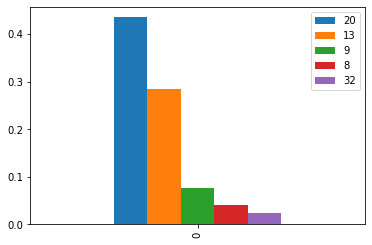

In [46]:
anom_event_count_list_ordered_top5.plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

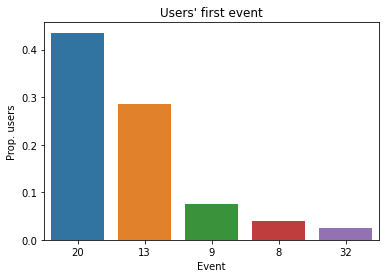

In [47]:
import seaborn as sns
ax = sns.barplot(data=anom_event_count_list_ordered_top5)
ax.set(xlabel='Event', ylabel='Prop. users', title="Users' first event")
plt.show

In [48]:
def event_rank_count_nb(user_list, event_list, time_matched_events, event_rank_num):
    #create dataframe titled with unique event IDs:
    anom_event_count_list = pd.DataFrame(0, columns=event_list, index=[0])

    for n in range(len(user_list)-1):
        this_user = user_list[n]
        user_raw = time_matched_events[time_matched_events.userId == this_user].reset_index(drop=True)
        if len(user_raw) > event_rank_num:
            count_event = user_raw.event[event_rank_num]
            anom_event_count_list[count_event][0] = anom_event_count_list[count_event][0] + 1
        else:
            continue
    return anom_event_count_list

In [49]:
first_count_list = event_rank_count_nb(anom_user_id_list, anom_event_id_list, matched_anom_raw_events, 0)
first_count_list

,22,17,21,9,20,18,4,15,13,8,...,2,31,6,39,49,42,47,40,10,48
0,14,10,2,143,816,39,14,12,535,76,...,0,27,0,0,0,1,0,0,0,0


In [50]:
anom_user_id_list

array([228702, 228701,     55, ..., 229817, 229818, 229819])

In [51]:
anom_event_id_list

array([22, 17, 21,  9, 20, 18,  4, 15, 13,  8,  7, 14, 30,  1, 11, 12, 23,
       24, 43, 35, 36,  5, 16,  3, 37, 32, 44, 45, 38, 34, 41, 25, 33, 46,
        2, 31,  6, 39, 49, 42, 47, 40, 10, 48])

In [52]:
matched_anom_raw_events

,Unnamed: 0,event,timestamp,userId,timestamp_rounded
1157147,1157147,22,2020-06-22 18:00:02.718,228702,2020-06-22 18:00:00
1157148,1157148,17,2020-06-22 18:00:03.311,228701,2020-06-22 18:00:00
1157149,1157149,21,2020-06-22 18:00:03.484,228702,2020-06-22 18:00:00
1157150,1157150,9,2020-06-22 18:00:06.016,55,2020-06-22 18:00:00
1157151,1157151,20,2020-06-22 18:00:08.718,228732,2020-06-22 18:00:00
...,...,...,...,...,...
1175595,1175595,13,2020-06-22 23:59:55.403,229663,2020-06-22 23:00:00
1175596,1175596,4,2020-06-22 23:59:55.491,228606,2020-06-22 23:00:00
1175597,1175597,9,2020-06-22 23:59:56.857,228606,2020-06-22 23:00:00
1175598,1175598,18,2020-06-22 23:59:57.488,151650,2020-06-22 23:00:00


In [53]:
def plot_event_rank_nb(count_list, click_num, user_list):
    #now sorting the column by values in ascending order:
    event_count_list_ordered = count_list.sort_values(by=0, ascending=False, axis=1)
    event_count_list_ordered_prop = event_count_list_ordered/len(user_list)
    event_count_list_ordered_prop_top_ranked = event_count_list_ordered_prop[event_count_list_ordered_prop.columns[0:5]]
    
    import seaborn as sns
    ax = sns.barplot(data=event_count_list_ordered_prop_top_ranked)
    ax.set(xlabel='Event', ylabel='Prop. users', title="Click #"+str(click_num))
    return plt.show

<function matplotlib.pyplot.show(*args, **kw)>

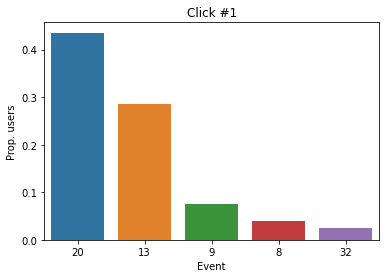

In [54]:
plot_event_rank_nb(first_count_list, 1, anom_user_id_list)

In [55]:
second_count_list = event_rank_count_nb(anom_user_id_list, anom_event_id_list, matched_anom_raw_events, 1)
second_count_list

,22,17,21,9,20,18,4,15,13,8,...,2,31,6,39,49,42,47,40,10,48
0,12,12,6,51,125,31,29,18,505,463,...,2,7,1,0,1,0,1,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

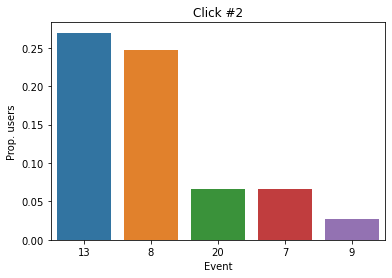

In [56]:
plot_event_rank_nb(second_count_list, 2, anom_user_id_list)

In [57]:
third_count_list = event_rank_count_nb(anom_user_id_list, anom_event_id_list, matched_anom_raw_events, 2)
third_count_list

,22,17,21,9,20,18,4,15,13,8,...,2,31,6,39,49,42,47,40,10,48
0,8,46,5,111,106,24,29,55,209,194,...,13,0,5,0,1,0,0,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

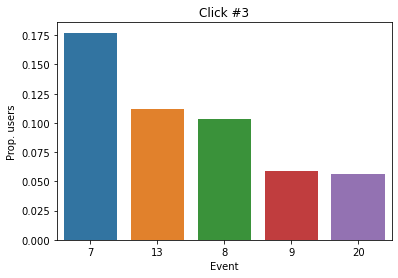

In [58]:
plot_event_rank_nb(third_count_list, 3, anom_user_id_list)

# Getting the probability distribution of the event traversals

In [59]:
def stream_to_prob_nb(stream_data_df): 
    stream_data_df_reindexed = stream_data_df.reset_index(drop=True)
    unique_users = stream_data_df_reindexed.userId.unique()
    unique_events = stream_data_df_reindexed.event.unique()
    user_mat = np.zeros((len(unique_events), len(unique_events)))
    
    for n in range(len(stream_data_df_reindexed)-1):
        if n != len(stream_data_df_reindexed)-1:
            this_user = stream_data_df_reindexed.userId[n]
            this_event = stream_data_df_reindexed.event[n]
            this_event_index = np.where(unique_events == this_event)[0][0]
        
            next_user = stream_data_df_reindexed.userId[n+1]
            next_event = stream_data_df_reindexed.event[n+1]
            next_event_index = np.where(unique_events == next_event)[0][0]
        
            if n > 0:
                before_user = stream_data_df_reindexed.userId[n-1]
                before_event = stream_data_df_reindexed.event[n-1]
                before_event_index = np.where(unique_events == before_event)[0][0]
            else:
                before_user = stream_data_df_reindexed.userId[n]
                before_event = stream_data_df_reindexed.event[n]
                before_event_index = np.where(unique_events == before_event)[0][0]                
            
            if this_user == next_user:
                user_mat[this_event_index, next_event_index] = user_mat[this_event_index, next_event_index] + 1
            elif this_user != next_user and this_user != before_user:
                user_mat[this_event_index, this_event_index] = user_mat[this_event_index, this_event_index] + 1
            
    #sum rows
    row_sum = user_mat.sum(axis=0).tolist()

    #sum columns
    col_sum = user_mat.sum(axis=1).tolist()

    user_mat_div = user_mat / row_sum
    
    return user_mat_div

#### probability matrix of anomaly

In [60]:
anom_mat_div = stream_to_prob_nb(matched_anom_raw_events)
anom_mat_div
anom_data_names = matched_anom_raw_events.event.unique()
anom_mat_div #np.sum(anom_mat_div[:, 16]) #checking if columns = 1

array([[0.49802372, 0.        , 0.55223881, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99171271, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50197628, 0.        , 0.44278607, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

#### probability matrix of non-anomaly

In [61]:
nonanom_mat_div = stream_to_prob_nb(matched_nonanom_raw_events)
nonanom_mat_div
nonanom_data_names = matched_nonanom_raw_events.event.unique()
nonanom_mat_div #np.sum(anom_mat_div[:, 16]) #checking if columns = 1

array([[0.82090309, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.24175824, 0.93417722, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.34065934, 0.06329114, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Plotting probability matracies

In [62]:
def plot_stream_prob_nb(stream_prob_mat, raw_events, *img_name):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colors as clr
    
    event_list = list(raw_events)
    fig = plt.figure()
    fig = plt.tight_layout()
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    color = clr.LinearSegmentedColormap.from_list('custom blue', ['whitesmoke','royalblue'], N=256)
    ax.matshow(stream_prob_mat, cmap=color)
    fig.colorbar(ax.matshow(stream_prob_mat, cmap=color))
    ax.set_yticks(range(len(event_list)+1))
    ax.set_yticklabels(event_list+[''], fontsize=15)
    ax.set_xticks(range(len(event_list)+1))
    plt.xticks(rotation=90, ha='right')
    ax.set_xticklabels(['']+event_list, fontsize=15) 
    if type(img_name)== str:
        fig.savefig(str(img_name) + '.pdf', bbox_inches = "tight")
        
    return plt.show()

#### Plotting matrix of anomaly

<Figure size 432x288 with 0 Axes>

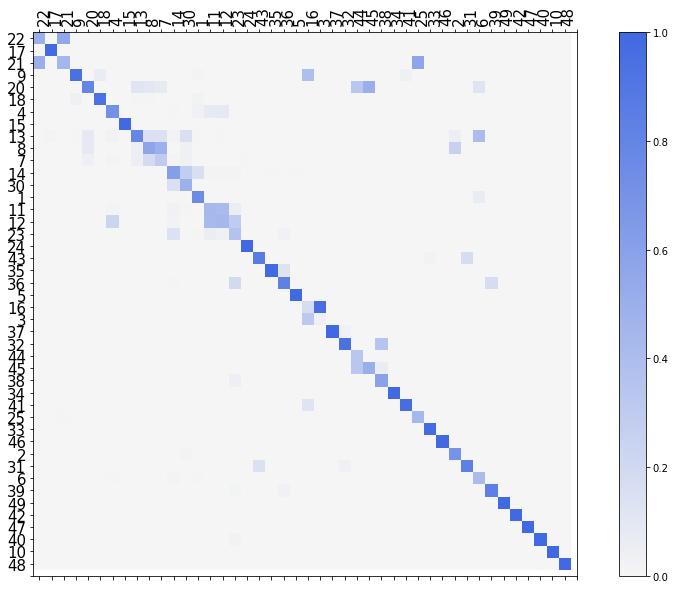

In [63]:
plot_stream_prob_nb(anom_mat_div, anom_data_names, 'anom_test')

<Figure size 432x288 with 0 Axes>

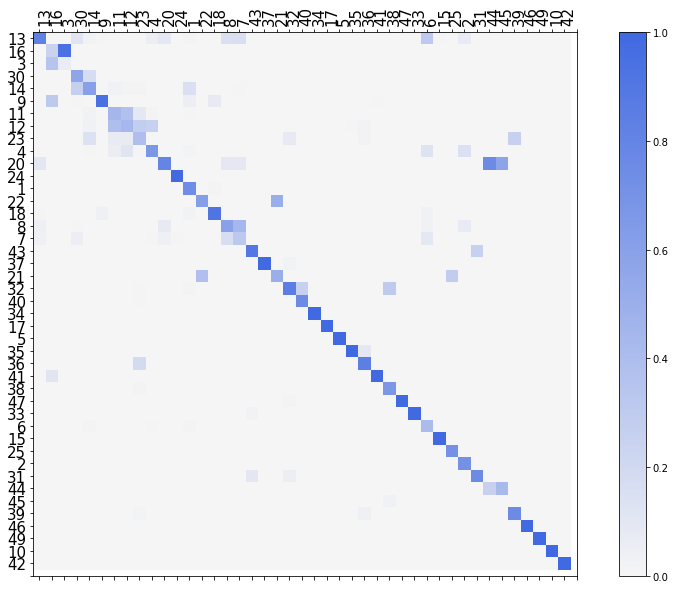

In [64]:
plot_stream_prob_nb(nonanom_mat_div, nonanom_data_names, 'nonanom_test')

### Matching plots of anomaly and non-anomaly probabilities

In [65]:
# convert the matrix to a dataframe with names on the x and y axis 
anom_mat_div_df = pd.DataFrame(anom_mat_div)
anom_mat_div_df.columns = anom_data_names
anom_mat_div_df.index = anom_data_names
anom_mat_div_df

,22,17,21,9,20,18,4,15,13,8,...,2,31,6,39,49,42,47,40,10,48
22,0.498024,0.000000,0.552239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
17,0.000000,0.991713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
21,0.501976,0.000000,0.442786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.948543,0.000000,0.062008,0.000000,0.000000,0.001019,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20,0.000000,0.000000,0.000000,0.000455,0.794146,0.000000,0.000000,0.000000,0.112130,0.101145,...,0.000000,0.000000,0.117647,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
18,0.000000,0.000000,0.000000,0.034608,0.000000,0.934055,0.000000,0.000000,0.004587,0.005725,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000455,0.000000,0.000000,0.711196,0.000000,0.002039,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15,0.000000,0.000000,0.000000,0.002277,0.000000,0.000000,0.000000,0.997347,0.000510,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
13,0.000000,0.008287,0.000000,0.006375,0.084878,0.001969,0.022901,0.002653,0.791539,0.143130,...,0.043478,0.000000,0.411765,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.084878,0.000000,0.002545,0.000000,0.043833,0.564885,...,0.260870,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# convert the matrix to a dataframe with names on the x and y axis 
nonanom_mat_div_df = pd.DataFrame(nonanom_mat_div)
nonanom_mat_div_df.columns = nonanom_data_names
nonanom_mat_div_df.index = nonanom_data_names
nonanom_mat_div_df

,13,16,3,30,14,9,11,12,23,4,...,25,2,31,44,45,39,46,49,10,42
13,0.820903,0.000000,0.000000,0.111732,0.019553,0.007349,0.002066,0.000000,0.000000,0.047337,...,0.000000,0.071429,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
16,0.000000,0.241758,0.934177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
3,0.000000,0.340659,0.063291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
30,0.000000,0.000000,0.000000,0.569832,0.164804,0.000490,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
14,0.000000,0.000000,0.000000,0.262570,0.603352,0.000490,0.026860,0.009158,0.009063,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
9,0.002029,0.307692,0.002532,0.005587,0.003724,0.948555,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
11,0.000000,0.000000,0.000000,0.000000,0.021415,0.000490,0.448347,0.371795,0.093656,0.008876,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
12,0.000000,0.000000,0.000000,0.000000,0.028864,0.000490,0.392562,0.437729,0.277946,0.258876,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0
23,0.000000,0.000000,0.000000,0.000000,0.135940,0.000000,0.072314,0.067766,0.389728,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.25,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.004655,0.001470,0.057851,0.111722,0.006042,0.667160,...,0.000000,0.142857,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0


In [67]:
anom_diff_name = set(anom_data_names).difference(set(nonanom_data_names))
anom_diff_name

{48}

In [68]:
anom_mat_div_df_drop = anom_mat_div_df.drop(anom_diff_name, axis = 0)
anom_mat_div_df_drop = anom_mat_div_df_drop.drop(anom_diff_name, axis = 1)

In [69]:
anom_mat_div_df_drop_col = anom_mat_div_df_drop.columns
anom_mat_div_df_drop_col

Int64Index([22, 17, 21,  9, 20, 18,  4, 15, 13,  8,  7, 14, 30,  1, 11, 12, 23,
            24, 43, 35, 36,  5, 16,  3, 37, 32, 44, 45, 38, 34, 41, 25, 33, 46,
             2, 31,  6, 39, 49, 42, 47, 40, 10],
           dtype='int64')

In [70]:
#reorder the columns to match:
anom_mat_div_df_drop_reorder = anom_mat_div_df_drop.reindex(columns=anom_mat_div_df_drop_col)
anom_mat_div_df_drop_reorder = anom_mat_div_df_drop_reorder.reindex(anom_mat_div_df_drop_col)
anom_mat_div_df_drop_reorder

,22,17,21,9,20,18,4,15,13,8,...,46,2,31,6,39,49,42,47,40,10
22,0.498024,0.000000,0.552239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
17,0.000000,0.991713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
21,0.501976,0.000000,0.442786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.948543,0.000000,0.062008,0.000000,0.000000,0.001019,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
20,0.000000,0.000000,0.000000,0.000455,0.794146,0.000000,0.000000,0.000000,0.112130,0.101145,...,0.0,0.000000,0.000000,0.117647,0.000000,0.0,0.0,0.0,0.0,0.0
18,0.000000,0.000000,0.000000,0.034608,0.000000,0.934055,0.000000,0.000000,0.004587,0.005725,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000455,0.000000,0.000000,0.711196,0.000000,0.002039,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
15,0.000000,0.000000,0.000000,0.002277,0.000000,0.000000,0.000000,0.997347,0.000510,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
13,0.000000,0.008287,0.000000,0.006375,0.084878,0.001969,0.022901,0.002653,0.791539,0.143130,...,0.0,0.043478,0.000000,0.411765,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.084878,0.000000,0.002545,0.000000,0.043833,0.564885,...,0.0,0.260870,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

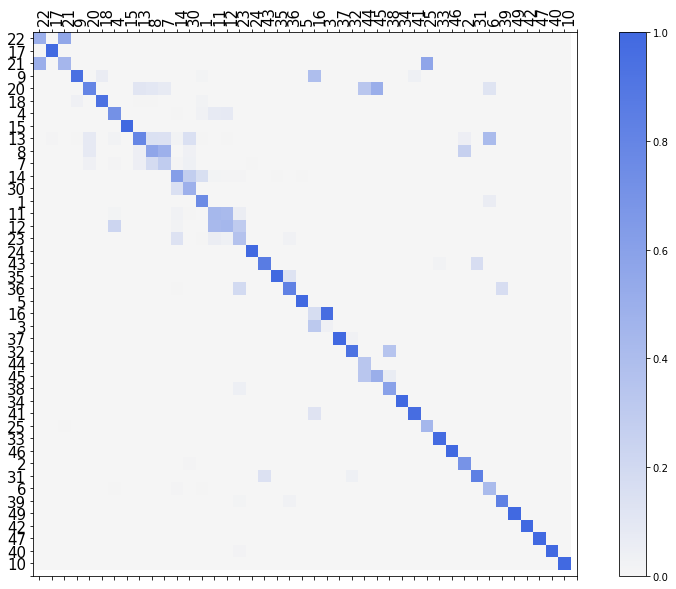

In [71]:
plot_stream_prob_nb(anom_mat_div_df_drop_reorder.to_numpy(), anom_mat_div_df_drop_reorder.columns.values, 'anom_mat')

In [72]:
nonanom_diff_name = set(nonanom_data_names).difference(set(anom_data_names))
nonanom_diff_name

set()

In [73]:
nonanom_mat_div_df_drop = nonanom_mat_div_df.drop(nonanom_diff_name, axis = 0)
nonanom_mat_div_df_drop = nonanom_mat_div_df_drop.drop(nonanom_diff_name, axis = 1)

In [74]:
#reorder the columns to match:
nonanom_mat_div_df_drop_reorder = nonanom_mat_div_df_drop.reindex(columns=anom_mat_div_df_drop_col)
nonanom_mat_div_df_drop_reorder = nonanom_mat_div_df_drop_reorder.reindex(anom_mat_div_df_drop_col)
nonanom_mat_div_df_drop_reorder

,22,17,21,9,20,18,4,15,13,8,...,46,2,31,6,39,49,42,47,40,10
22,0.620879,0.00000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,0.0
17,0.000000,0.99635,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,0.0
21,0.379121,0.00000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,0.0
9,0.000000,0.00000,0.0,0.948555,0.000000,0.075701,0.000000,0.000000,0.002029,0.000000,...,0.0,0.000000,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,0.0
20,0.000000,0.00000,0.0,0.000490,0.795455,0.000000,0.000000,0.000000,0.099442,0.087432,...,0.0,0.000000,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,0.0
18,0.000000,0.00000,0.0,0.036257,0.000000,0.914019,0.000000,0.000000,0.004566,0.000000,...,0.0,0.000000,0.00,0.03125,0.00,0.0,0.0,0.0,0.00,0.0
4,0.000000,0.00000,0.0,0.001470,0.000000,0.000000,0.667160,0.000000,0.000000,0.000000,...,0.0,0.142857,0.00,0.12500,0.00,0.0,0.0,0.0,0.00,0.0
15,0.000000,0.00000,0.0,0.001470,0.000000,0.000000,0.000000,0.995964,0.001522,0.000000,...,0.0,0.000000,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,0.0
13,0.000000,0.00365,0.0,0.007349,0.090909,0.000935,0.047337,0.004036,0.820903,0.150273,...,0.0,0.071429,0.00,0.31250,0.00,0.0,0.0,0.0,0.00,0.0
8,0.000000,0.00000,0.0,0.000000,0.077922,0.000000,0.002959,0.000000,0.039066,0.595628,...,0.0,0.071429,0.00,0.03125,0.00,0.0,0.0,0.0,0.00,0.0


<Figure size 432x288 with 0 Axes>

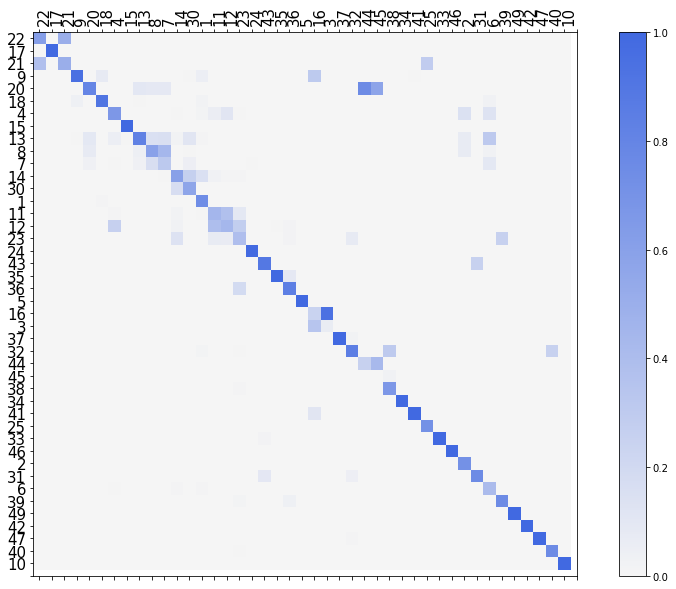

In [75]:
plot_stream_prob_nb(nonanom_mat_div_df_drop_reorder.to_numpy(), nonanom_mat_div_df_drop_reorder.columns.values, 'nonanom_mat')

In [76]:
def plot_stream_diff_prob_nb(stream_prob_mat, event_list, *img_name):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colors as clr
    mid_norm = clr.TwoSlopeNorm(vcenter=0.)
    
    fig = plt.figure()
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    color = 'bwr_r'
    ax.matshow(stream_prob_mat, cmap=color)
    fig.colorbar(ax.matshow(stream_prob_mat, cmap=color, norm=mid_norm))
    ax.set_yticks(range(len(event_list)+1))
    ax.set_yticklabels(event_list+[''], fontsize=15)
    ax.set_xticks(range(len(event_list)+1))
    plt.xticks(rotation=90, ha='right')
    ax.set_xticklabels(['']+event_list, fontsize=15) 
    if type(img_name)== str:
        fig.savefig(img_name + '.pdf', bbox_inches = "tight")

    return plt.show()

In [77]:
diff_df =  anom_mat_div_df_drop_reorder - nonanom_mat_div_df_drop_reorder
diff_df

,22,17,21,9,20,18,4,15,13,8,...,46,2,31,6,39,49,42,47,40,10
22,-0.122855,0.000000,0.052239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
17,0.000000,-0.004638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
21,0.122855,0.000000,-0.057214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
9,0.000000,0.000000,0.000000,-0.000012,0.000000,-0.013693,0.000000,0.000000,-0.001010,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
20,0.000000,0.000000,0.000000,-0.000035,-0.001308,0.000000,0.000000,0.000000,0.012689,0.013713,...,0.0,0.000000,0.000000,0.117647,0.000000,0.0,0.0,0.0,0.00,0.0
18,0.000000,0.000000,0.000000,-0.001648,0.000000,0.020036,0.000000,0.000000,0.000021,0.005725,...,0.0,0.000000,0.000000,-0.031250,0.000000,0.0,0.0,0.0,0.00,0.0
4,0.000000,0.000000,0.000000,-0.001014,0.000000,0.000000,0.044036,0.000000,0.002039,0.000000,...,0.0,-0.142857,0.000000,-0.125000,0.000000,0.0,0.0,0.0,0.00,0.0
15,0.000000,0.000000,0.000000,0.000807,0.000000,0.000000,0.000000,0.001384,-0.001012,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
13,0.000000,0.004638,0.000000,-0.000974,-0.006031,0.001034,-0.024437,-0.001384,-0.029364,-0.007143,...,0.0,-0.027950,0.000000,0.099265,0.000000,0.0,0.0,0.0,0.00,0.0
8,0.000000,0.000000,0.000000,0.000000,0.006956,0.000000,-0.000414,0.000000,0.004766,-0.030743,...,0.0,0.189441,0.000000,-0.031250,0.000000,0.0,0.0,0.0,0.00,0.0


<Figure size 432x288 with 0 Axes>

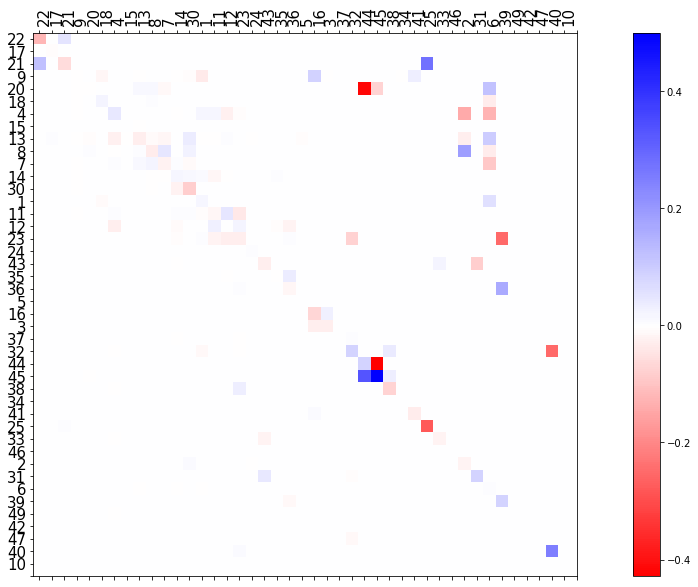

In [78]:
plot_stream_diff_prob_nb(diff_df.to_numpy(), list(diff_df.columns.values), 'diff_mat')

In [268]:
#find the biggest values in all the columns and rows:
diff_df_col_max = diff_df.max(axis=1)
diff_df_col_max_ord = diff_df_col_max.sort_values(ascending=False)
diff_df_row_max = diff_df.max(axis=0)
diff_df_row_max_ord = diff_df_row_max.sort_values(ascending=False)

#find the smallest values in all the columns and rows:
diff_df_col_min = diff_df.min(axis=1)
diff_df_col_min_ord = diff_df_col_min.sort_values(ascending=True)
diff_df_row_min = diff_df.min(axis=0)
diff_df_row_min_ord = diff_df_row_min.sort_values(ascending=True)

#then get the 5 biggest rows and columns
col_max = np.array(diff_df_col_max_ord.nlargest(5).index)
row_max = np.array(diff_df_row_max_ord.nlargest(5).index)
val_max = np.array(diff_df_row_max_ord.nlargest(5).values)
tog_max = np.array([col_max, row_max, val_max]).transpose()
diff_df_max_sort_df = pd.DataFrame(tog_max, columns=['col_event', 'row_event', 'prob']) 
diff_df_max_sort_df.insert(2, "trans_col", [str(m)+'-'+str(n) for m,n in zip(row_max, col_max)]) 


#then get the 5 smallest rows and columns
col_min = np.array(diff_df_col_min_ord.nsmallest(5).index)
row_min = np.array(diff_df_row_min_ord.nsmallest(5).index)
val_min = np.array(diff_df_row_min_ord.nsmallest(5).values)
tog_min = np.array([col_min, row_min, val_min]).transpose()
diff_df_min_sort_df = pd.DataFrame(tog_min, columns=['col_event', 'row_event', 'prob']) 
diff_df_min_sort_df.insert(2, "trans_col", [str(m)+'-'+str(n) for m,n in zip(row_min, col_min)]) 
diff_df_min_sort_df = diff_df_min_sort_df.sort_values('prob')

In [269]:
diff_df_max_sort_df

,col_event,row_event,trans_col,prob
0,45.0,45.0,45-45,0.500000
1,21.0,44.0,44-21,0.333333
2,40.0,25.0,25-40,0.276786
3,8.0,40.0,40-8,0.250000
4,36.0,2.0,2-36,0.189441


In [270]:
diff_df_min_sort_df

,col_event,row_event,trans_col,prob
0,44.0,45.0,45-44,-0.428571
1,20.0,44.0,44-20,-0.416667
2,25.0,25.0,25-25,-0.276786
3,32.0,39.0,39-32,-0.250000
4,23.0,40.0,40-23,-0.250000


<function matplotlib.pyplot.show(*args, **kw)>

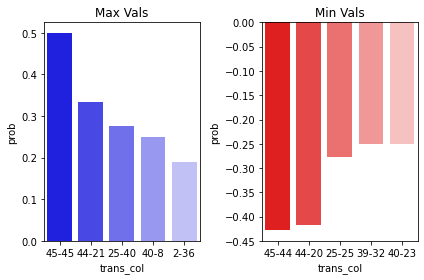

In [271]:
import seaborn as sns
f, axes = plt.subplots(1, 2)
max_pal = sns.color_palette(sns.light_palette("blue", reverse=True),len(diff_df_min_sort_df))
min_pal = sns.color_palette(sns.light_palette("red", reverse=True),len(diff_df_max_sort_df))
ax1 = sns.barplot(x="trans_col", y="prob", data = diff_df_max_sort_df, palette=np.array(max_pal[::1]), ax=axes[0]).set_title("Max Vals")
ax2 = sns.barplot(x="trans_col", y="prob", data = diff_df_min_sort_df, palette=np.array(min_pal[::1]), ax=axes[1]).set_title("Min Vals")
f = plt.tight_layout()
plt.show